# Rsi_Score 를 활용한 백테스팅

### buy = 0, sell = 0

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install finterstellar

data = pd.read_csv('CJ대한통운_19_21.csv', encoding = 'euc-kr')

     |████████████████████████████████| 109 kB 3.1 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
data

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2018-07-02,163000,-5000,-2.98,167000,169000,161500,104205,1.730970e+10,3.718410e+12,22812344
1,2018-07-03,167500,4500,2.76,163000,169000,163000,73375,1.229465e+10,3.821070e+12,22812344
2,2018-07-04,172500,5000,2.99,166000,176500,165500,146237,2.546774e+10,3.935130e+12,22812344
3,2018-07-05,169500,-3000,-1.74,173000,174000,165500,96180,1.617033e+10,3.866690e+12,22812344
4,2018-07-06,168500,-1000,-0.59,169500,171000,167500,65635,1.113304e+10,3.843880e+12,22812344
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,129000,-500,-0.39,130000,131000,128500,29982,3.872974e+09,2.942790e+12,22812344
862,2021-12-28,125000,-4000,-3.10,129000,129500,123500,190152,2.375581e+10,2.851540e+12,22812344
863,2021-12-29,126500,1500,1.20,125000,128000,124000,58042,7.340787e+09,2.885760e+12,22812344
864,2021-12-30,126000,-500,-0.40,126500,126500,124500,66720,8.386864e+09,2.874360e+12,22812344


In [ ]:
# 필요한 열만 추출하고 영어로 변경
Rename(data)

EMA(data)

# MACD(data)

# Bollinger(data)

#단순 이동 평균선 30일
SMA(data)

# RSI 생성
RSI(data)

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,RSI
0,2018-07-02,163000,167000,169000,161500,104205,NaN,NaN,NaN,NaN,NaN
1,2018-07-03,167500,163000,169000,163000,73375,NaN,NaN,NaN,NaN,NaN
2,2018-07-04,172500,166000,176500,165500,146237,NaN,NaN,NaN,NaN,NaN
3,2018-07-05,169500,173000,174000,165500,96180,NaN,NaN,NaN,NaN,NaN
4,2018-07-06,168500,169500,171000,167500,65635,168200.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667,41.935484
862,2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000,25.714286
863,2021-12-29,126500,125000,128000,124000,58042,128100.0,130850.0,138358.333333,155195.833333,27.777778
864,2021-12-30,126000,126500,126500,124500,66720,127200.0,130700.0,137950.000000,154741.666667,25.000000


In [ ]:
# 1. 30 이하는 매수 (현재보다 다음날이 클 경우 매수 나머지는 보류)
# 2. 30 ~ 70 사이는 전부 보류
# 3. 70 이상은 매도

def RSI_Score_back(df):
  box = []
  for i in range(len(df)-1):
    if df.iloc[i]['RSI'] <= 30:
      if df.iloc[i]['RSI'] < df.iloc[i+1]['RSI']:
        box.append(1)
      else:
        box.append(0)
    elif df.iloc[i]['RSI'] > 70:
        box.append(-1)
    else:
        box.append(0)
  box.append(0)
  df['Rsi_Score'] = box
  df = df.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)
  return df

In [ ]:
RSI_Score_back(data)

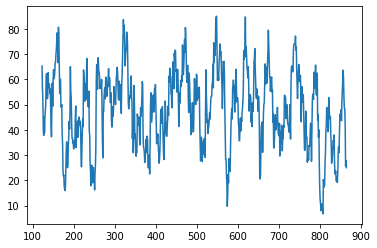

In [ ]:
plt.plot(data['RSI'])

In [ ]:
import pandas as pd
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 123 to 864
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       742 non-null    datetime64[ns]
 1   Close      742 non-null    int64         
 2   Open       742 non-null    int64         
 3   High       742 non-null    int64         
 4   Low        742 non-null    int64         
 5   Volume     742 non-null    int64         
 6   ma5        742 non-null    float64       
 7   ma20       742 non-null    float64       
 8   ma60       742 non-null    float64       
 9   ma120      742 non-null    float64       
 10  RSI        742 non-null    float64       
 11  Rsi_Score  742 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 75.4 KB


In [ ]:
data = data.set_index('Date')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2019-01-02 to 2021-12-30
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close      742 non-null    int64  
 1   Open       742 non-null    int64  
 2   High       742 non-null    int64  
 3   Low        742 non-null    int64  
 4   Volume     742 non-null    int64  
 5   ma5        742 non-null    float64
 6   ma20       742 non-null    float64
 7   ma60       742 non-null    float64
 8   ma120      742 non-null    float64
 9   RSI        742 non-null    float64
 10  Rsi_Score  742 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 69.6 KB


In [ ]:

import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='Rsi_Score', buy=0, sell=0)

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
2019-01-08    zero
              ... 
2021-12-24     buy
2021-12-27     buy
2021-12-28     buy
2021-12-29     buy
2021-12-30     buy
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
2019-01-08    zz
              ..
2021-12-24    ll
2021-12-27    ll
2021-12-28    ll
2021-12-29    ll
2021-12-30    ll
Name: position, Length: 742, dtype: object

<Figure size 1800x1080 with 0 Axes>

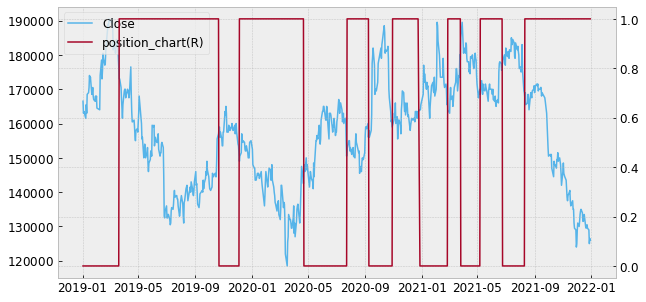

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=0.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,RSI,Rsi_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,
2019-01-02,166500,166000,168000,163000,35501,166800.0,164375.0,156833.333333,157162.500000,65.306122,0,zero,,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-03,163000,167000,167500,162500,38021,166000.0,164700.0,156991.666667,157116.666667,56.363636,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,0.9790
2019-01-04,163500,162000,164000,161000,34069,165700.0,164950.0,157166.666667,157037.500000,52.000000,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,0.9820
2019-01-07,162000,166000,168500,160500,39074,164400.0,165250.0,157400.000000,156945.833333,40.000000,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,0.9730
2019-01-08,161500,164000,164500,160500,35181,163300.0,165425.0,157758.333333,156854.166667,37.777778,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,0.9700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,129500,130500,131500,129000,29213,129900.0,130725.0,139591.666667,156529.166667,48.484848,0,buy,ll,1,1.0,0.992337,0.890122,-10.99,0.7551,0.6798
2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667,41.935484,0,buy,ll,1,1.0,0.996139,0.886686,-11.33,0.7522,0.6772
2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000,25.714286,1,buy,ll,1,1.0,0.968992,0.859191,-14.08,0.7289,0.6562


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.02)

CAGR: -4.69%
Accumulated return: -13.39%
Average return: 2.58%
Benchmark return : -24.32%
Number of trades: 7
Number of win: 4
Hit ratio: 57.14%
Investment period: 3.0yrs
Sharpe ratio: -0.24
MDD: -28.59%
Benchmark MDD: -37.80%


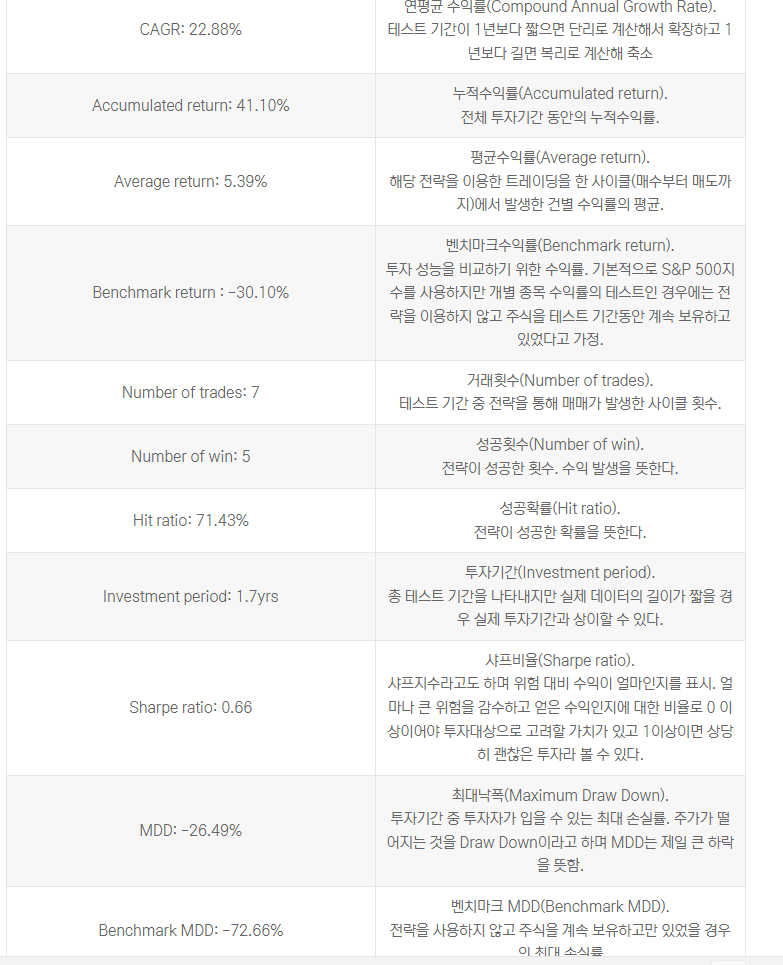

## buy = -0.5, sell = 0.5

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('CJ대한통운_19_21.csv', encoding = 'euc-kr')

In [ ]:
Rename(data)

,Date,Close,Open,High,Low,Volume
0,2018-07-02,163000,167000,169000,161500,104205
1,2018-07-03,167500,163000,169000,163000,73375
2,2018-07-04,172500,166000,176500,165500,146237
3,2018-07-05,169500,173000,174000,165500,96180
4,2018-07-06,168500,169500,171000,167500,65635
...,...,...,...,...,...,...
861,2021-12-27,129000,130000,131000,128500,29982
862,2021-12-28,125000,129000,129500,123500,190152
863,2021-12-29,126500,125000,128000,124000,58042
864,2021-12-30,126000,126500,126500,124500,66720


In [ ]:
EMA(data)

# MACD(data)

# Bollinger(data)

#단순 이동 평균선 30일
SMA(data)

# RSI 생성
RSI(data)

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,RSI
0,2018-07-02,163000,167000,169000,161500,104205,NaN,NaN,NaN,NaN,NaN
1,2018-07-03,167500,163000,169000,163000,73375,NaN,NaN,NaN,NaN,NaN
2,2018-07-04,172500,166000,176500,165500,146237,NaN,NaN,NaN,NaN,NaN
3,2018-07-05,169500,173000,174000,165500,96180,NaN,NaN,NaN,NaN,NaN
4,2018-07-06,168500,169500,171000,167500,65635,168200.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667,41.935484
862,2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000,25.714286
863,2021-12-29,126500,125000,128000,124000,58042,128100.0,130850.0,138358.333333,155195.833333,27.777778
864,2021-12-30,126000,126500,126500,124500,66720,127200.0,130700.0,137950.000000,154741.666667,25.000000


In [ ]:
# 1. 30 이하는 매수 (현재보다 다음날이 클 경우 매수 나머지는 보류)
# 2. 30 ~ 70 사이는 전부 보류
# 3. 70 이상은 매도

def RSI_Score_back(df):
  box = []
  for i in range(len(df)-1):
    if df.iloc[i]['RSI'] <= 30:
      if df.iloc[i]['RSI'] < df.iloc[i+1]['RSI']:
        box.append(1)
      else:
        box.append(0)
    elif df.iloc[i]['RSI'] > 70:
        box.append(-1)
    else:
        box.append(0)
  box.append(0)
  df['Rsi_Score'] = box
  df = df.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)
  return df

In [ ]:
RSI_Score_back(data)

In [ ]:
data

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,RSI,Rsi_Score
123,2019-01-02,166500,166000,168000,163000,35501,166800.0,164375.0,156833.333333,157162.500000,65.306122,0
124,2019-01-03,163000,167000,167500,162500,38021,166000.0,164700.0,156991.666667,157116.666667,56.363636,0
125,2019-01-04,163500,162000,164000,161000,34069,165700.0,164950.0,157166.666667,157037.500000,52.000000,0
126,2019-01-07,162000,166000,168500,160500,39074,164400.0,165250.0,157400.000000,156945.833333,40.000000,0
127,2019-01-08,161500,164000,164500,160500,35181,163300.0,165425.0,157758.333333,156854.166667,37.777778,0
...,...,...,...,...,...,...,...,...,...,...,...,...
860,2021-12-24,129500,130500,131500,129000,29213,129900.0,130725.0,139591.666667,156529.166667,48.484848,0
861,2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667,41.935484,0
862,2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000,25.714286,1
863,2021-12-29,126500,125000,128000,124000,58042,128100.0,130850.0,138358.333333,155195.833333,27.777778,0


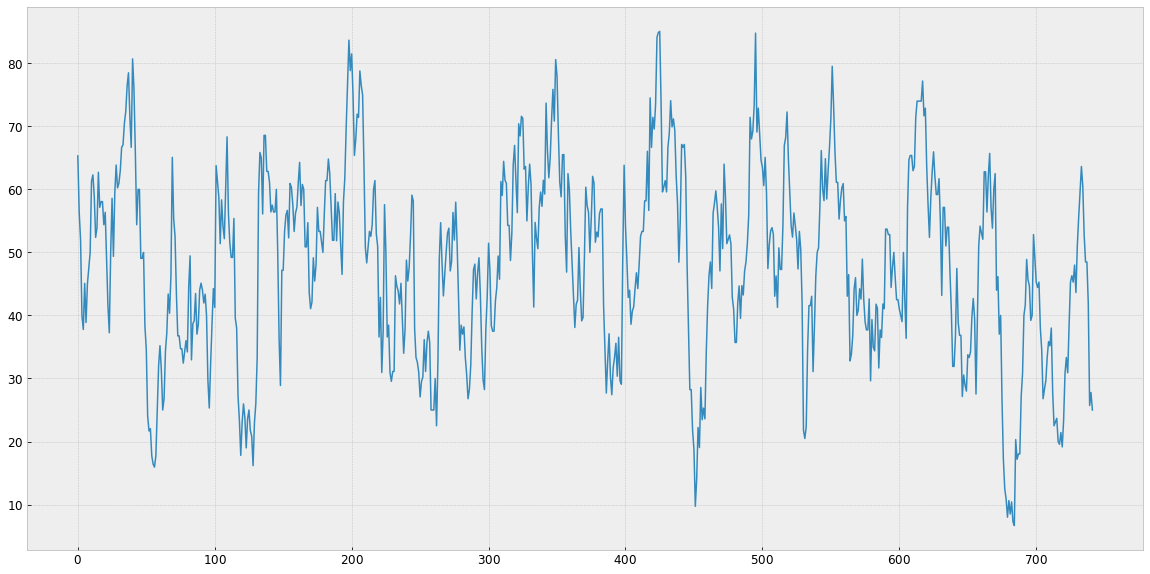

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.plot(range(len(data)),data['RSI'])
plt.show()

In [ ]:
import pandas as pd
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 123 to 864
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       742 non-null    datetime64[ns]
 1   Close      742 non-null    int64         
 2   Open       742 non-null    int64         
 3   High       742 non-null    int64         
 4   Low        742 non-null    int64         
 5   Volume     742 non-null    int64         
 6   ma5        742 non-null    float64       
 7   ma20       742 non-null    float64       
 8   ma60       742 non-null    float64       
 9   ma120      742 non-null    float64       
 10  RSI        742 non-null    float64       
 11  Rsi_Score  742 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 75.4 KB


In [ ]:
data = data.set_index('Date')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2019-01-02 to 2021-12-30
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close      742 non-null    int64  
 1   Open       742 non-null    int64  
 2   High       742 non-null    int64  
 3   Low        742 non-null    int64  
 4   Volume     742 non-null    int64  
 5   ma5        742 non-null    float64
 6   ma20       742 non-null    float64
 7   ma60       742 non-null    float64
 8   ma120      742 non-null    float64
 9   RSI        742 non-null    float64
 10  Rsi_Score  742 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 69.6 KB


In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='Rsi_Score', buy= -0.5, sell= 0.5)

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
2019-01-08    zero
              ... 
2021-12-24    zero
2021-12-27    zero
2021-12-28    zero
2021-12-29    zero
2021-12-30    zero
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
2019-01-08    zz
              ..
2021-12-24    zz
2021-12-27    zz
2021-12-28    zz
2021-12-29    zz
2021-12-30    zz
Name: position, Length: 742, dtype: object

<Figure size 1800x1080 with 0 Axes>

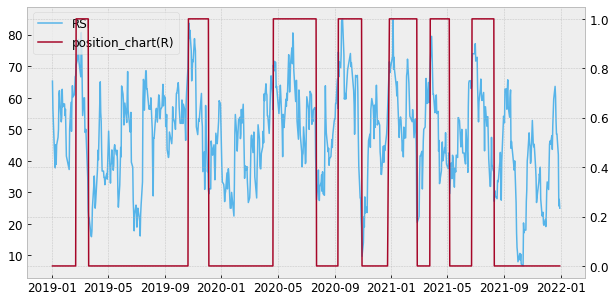

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['RSI'], right='position_chart')
plt.show()

<Figure size 1800x1080 with 0 Axes>

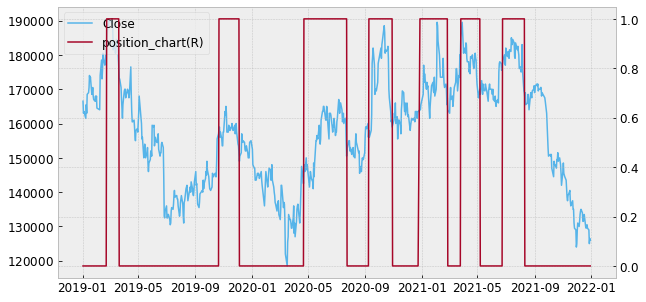

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,RSI,Rsi_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,
2019-01-02,166500,166000,168000,163000,35501,166800.0,164375.0,156833.333333,157162.500000,65.306122,0,zero,,0,1.0,1.0,1.000000,0.00,1.000,1.0000
2019-01-03,163000,167000,167500,162500,38021,166000.0,164700.0,156991.666667,157116.666667,56.363636,0,zero,zz,0,1.0,1.0,1.000000,0.00,1.000,0.9790
2019-01-04,163500,162000,164000,161000,34069,165700.0,164950.0,157166.666667,157037.500000,52.000000,0,zero,zz,0,1.0,1.0,1.000000,0.00,1.000,0.9820
2019-01-07,162000,166000,168500,160500,39074,164400.0,165250.0,157400.000000,156945.833333,40.000000,0,zero,zz,0,1.0,1.0,1.000000,0.00,1.000,0.9730
2019-01-08,161500,164000,164500,160500,35181,163300.0,165425.0,157758.333333,156854.166667,37.777778,0,zero,zz,0,1.0,1.0,1.000000,0.00,1.000,0.9700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,129500,130500,131500,129000,29213,129900.0,130725.0,139591.666667,156529.166667,48.484848,0,zero,zz,0,1.0,1.0,0.787515,-21.25,0.727,0.6798
2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667,41.935484,0,zero,zz,0,1.0,1.0,0.787515,-21.25,0.727,0.6772
2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000,25.714286,1,zero,zz,0,1.0,1.0,0.787515,-21.25,0.727,0.6562


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.01)

CAGR: -7.67%
Accumulated return: -21.25%
Average return: -3.27%
Benchmark return : -24.32%
Number of trades: 7
Number of win: 2
Hit ratio: 28.57%
Investment period: 3.0yrs
Sharpe ratio: -0.40
MDD: -27.30%
Benchmark MDD: -37.80%


## buy = 0.5, sell = -0.5

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('CJ대한통운_19_21.csv', encoding = 'euc-kr')

In [ ]:
Rename(data)

,Date,Close,Open,High,Low,Volume
0,2018-07-02,163000,167000,169000,161500,104205
1,2018-07-03,167500,163000,169000,163000,73375
2,2018-07-04,172500,166000,176500,165500,146237
3,2018-07-05,169500,173000,174000,165500,96180
4,2018-07-06,168500,169500,171000,167500,65635
...,...,...,...,...,...,...
861,2021-12-27,129000,130000,131000,128500,29982
862,2021-12-28,125000,129000,129500,123500,190152
863,2021-12-29,126500,125000,128000,124000,58042
864,2021-12-30,126000,126500,126500,124500,66720


In [ ]:
EMA(data)

# MACD(data)

# Bollinger(data)

#단순 이동 평균선 30일
SMA(data)

# RSI 생성
RSI(data)

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,RSI
0,2018-07-02,163000,167000,169000,161500,104205,NaN,NaN,NaN,NaN,NaN
1,2018-07-03,167500,163000,169000,163000,73375,NaN,NaN,NaN,NaN,NaN
2,2018-07-04,172500,166000,176500,165500,146237,NaN,NaN,NaN,NaN,NaN
3,2018-07-05,169500,173000,174000,165500,96180,NaN,NaN,NaN,NaN,NaN
4,2018-07-06,168500,169500,171000,167500,65635,168200.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667,41.935484
862,2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000,25.714286
863,2021-12-29,126500,125000,128000,124000,58042,128100.0,130850.0,138358.333333,155195.833333,27.777778
864,2021-12-30,126000,126500,126500,124500,66720,127200.0,130700.0,137950.000000,154741.666667,25.000000


In [ ]:
# 1. 30 이하는 매수 (현재보다 다음날이 클 경우 매수 나머지는 보류)
# 2. 30 ~ 70 사이는 전부 보류
# 3. 70 이상은 매도

def RSI_Score_back(df):
  box = []
  for i in range(len(df)-1):
    if df.iloc[i]['RSI'] <= 30:
      if df.iloc[i]['RSI'] < df.iloc[i+1]['RSI']:
        box.append(1)
      else:
        box.append(0)
    elif df.iloc[i]['RSI'] > 70:
        box.append(-1)
    else:
        box.append(0)
  box.append(0)
  df['Rsi_Score'] = box
  df = df.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)
  return df

In [ ]:
RSI_Score_back(data)

In [ ]:
data

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,RSI,Rsi_Score
123,2019-01-02,166500,166000,168000,163000,35501,166800.0,164375.0,156833.333333,157162.500000,65.306122,0
124,2019-01-03,163000,167000,167500,162500,38021,166000.0,164700.0,156991.666667,157116.666667,56.363636,0
125,2019-01-04,163500,162000,164000,161000,34069,165700.0,164950.0,157166.666667,157037.500000,52.000000,0
126,2019-01-07,162000,166000,168500,160500,39074,164400.0,165250.0,157400.000000,156945.833333,40.000000,0
127,2019-01-08,161500,164000,164500,160500,35181,163300.0,165425.0,157758.333333,156854.166667,37.777778,0
...,...,...,...,...,...,...,...,...,...,...,...,...
860,2021-12-24,129500,130500,131500,129000,29213,129900.0,130725.0,139591.666667,156529.166667,48.484848,0
861,2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667,41.935484,0
862,2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000,25.714286,1
863,2021-12-29,126500,125000,128000,124000,58042,128100.0,130850.0,138358.333333,155195.833333,27.777778,0


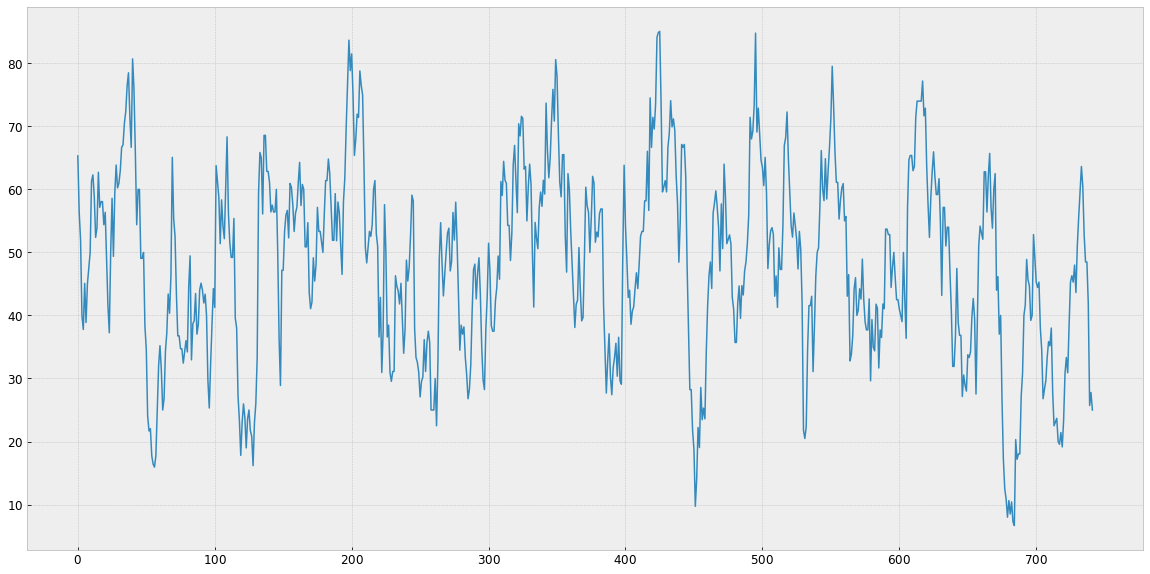

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.plot(range(len(data)),data['RSI'])
plt.show()

In [ ]:
import pandas as pd
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 123 to 864
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       742 non-null    datetime64[ns]
 1   Close      742 non-null    int64         
 2   Open       742 non-null    int64         
 3   High       742 non-null    int64         
 4   Low        742 non-null    int64         
 5   Volume     742 non-null    int64         
 6   ma5        742 non-null    float64       
 7   ma20       742 non-null    float64       
 8   ma60       742 non-null    float64       
 9   ma120      742 non-null    float64       
 10  RSI        742 non-null    float64       
 11  Rsi_Score  742 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 75.4 KB


In [ ]:
data = data.set_index('Date')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2019-01-02 to 2021-12-30
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close      742 non-null    int64  
 1   Open       742 non-null    int64  
 2   High       742 non-null    int64  
 3   Low        742 non-null    int64  
 4   Volume     742 non-null    int64  
 5   ma5        742 non-null    float64
 6   ma20       742 non-null    float64
 7   ma60       742 non-null    float64
 8   ma120      742 non-null    float64
 9   RSI        742 non-null    float64
 10  Rsi_Score  742 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 69.6 KB


In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='Rsi_Score', buy= 0.5, sell= -0.5)

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
2019-01-08    zero
              ... 
2021-12-24     buy
2021-12-27     buy
2021-12-28     buy
2021-12-29     buy
2021-12-30     buy
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
2019-01-08    zz
              ..
2021-12-24    ll
2021-12-27    ll
2021-12-28    ll
2021-12-29    ll
2021-12-30    ll
Name: position, Length: 742, dtype: object

<Figure size 1800x1080 with 0 Axes>

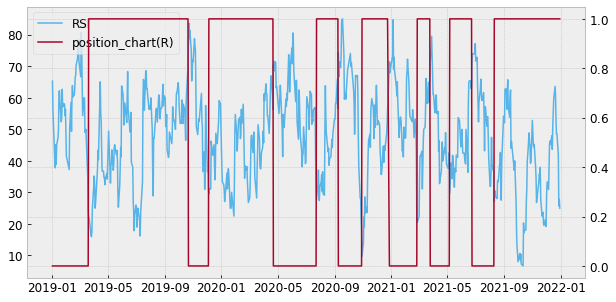

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['RSI'], right='position_chart')
plt.show()

<Figure size 1800x1080 with 0 Axes>

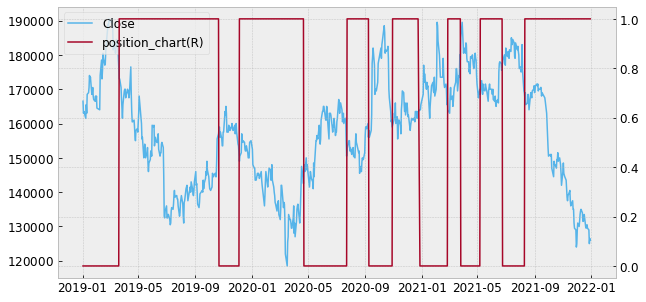

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,RSI,Rsi_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,
2019-01-02,166500,166000,168000,163000,35501,166800.0,164375.0,156833.333333,157162.500000,65.306122,0,zero,,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-03,163000,167000,167500,162500,38021,166000.0,164700.0,156991.666667,157116.666667,56.363636,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,0.9790
2019-01-04,163500,162000,164000,161000,34069,165700.0,164950.0,157166.666667,157037.500000,52.000000,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,0.9820
2019-01-07,162000,166000,168500,160500,39074,164400.0,165250.0,157400.000000,156945.833333,40.000000,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,0.9730
2019-01-08,161500,164000,164500,160500,35181,163300.0,165425.0,157758.333333,156854.166667,37.777778,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,0.9700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,129500,130500,131500,129000,29213,129900.0,130725.0,139591.666667,156529.166667,48.484848,0,buy,ll,1,1.0,0.992337,0.890122,-10.99,0.7551,0.6798
2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667,41.935484,0,buy,ll,1,1.0,0.996139,0.886686,-11.33,0.7522,0.6772
2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000,25.714286,1,buy,ll,1,1.0,0.968992,0.859191,-14.08,0.7289,0.6562


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.01)

CAGR: -4.69%
Accumulated return: -13.39%
Average return: 2.58%
Benchmark return : -24.32%
Number of trades: 7
Number of win: 4
Hit ratio: 57.14%
Investment period: 3.0yrs
Sharpe ratio: -0.20
MDD: -28.59%
Benchmark MDD: -37.80%




---



---



# MACD를 활용한 백테스팅

## buy = 0, sell =0

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('CJ대한통운_19_21.csv', encoding = 'euc-kr')

In [ ]:
data

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2018-07-02,163000,-5000,-2.98,167000,169000,161500,104205,1.730970e+10,3.718410e+12,22812344
1,2018-07-03,167500,4500,2.76,163000,169000,163000,73375,1.229465e+10,3.821070e+12,22812344
2,2018-07-04,172500,5000,2.99,166000,176500,165500,146237,2.546774e+10,3.935130e+12,22812344
3,2018-07-05,169500,-3000,-1.74,173000,174000,165500,96180,1.617033e+10,3.866690e+12,22812344
4,2018-07-06,168500,-1000,-0.59,169500,171000,167500,65635,1.113304e+10,3.843880e+12,22812344
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,129000,-500,-0.39,130000,131000,128500,29982,3.872974e+09,2.942790e+12,22812344
862,2021-12-28,125000,-4000,-3.10,129000,129500,123500,190152,2.375581e+10,2.851540e+12,22812344
863,2021-12-29,126500,1500,1.20,125000,128000,124000,58042,7.340787e+09,2.885760e+12,22812344
864,2021-12-30,126000,-500,-0.40,126500,126500,124500,66720,8.386864e+09,2.874360e+12,22812344


In [ ]:
# 필요한 열만 추출하고 영어로 변경
Rename(data)

EMA(data)

MACD(data)

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,MACD_Signal,MACD_Minus
0,2018-07-02,163000,167000,169000,161500,104205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-03,167500,163000,169000,163000,73375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-07-04,172500,166000,176500,165500,146237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-07-05,169500,173000,174000,165500,96180,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-06,168500,169500,171000,167500,65635,168200.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667,-2003.559187,-2242.188084,238.628897
862,2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000,-2310.991348,-2255.948737,-55.042611
863,2021-12-29,126500,125000,128000,124000,58042,128100.0,130850.0,138358.333333,155195.833333,-2405.862798,-2285.931549,-119.931249
864,2021-12-30,126000,126500,126500,124500,66720,127200.0,130700.0,137950.000000,154741.666667,-2492.661081,-2327.277455,-165.383626


In [ ]:
# MACD : 12일 이동평균 - 26일 이동평균 
# MACD_Minus : MACD - signal의 차

# 매수 시점 : MACD >0, MACD가 음수에서 양수로 변경, MACD_Minus가 양수
# 매도 시점 : MACD <0, MACD가 양수에서 음수로 변경, MACD_Minus가 음수

# 다음 날에도 상승세 or 하락세가 지속될 경우 추가 구매 없음

def MACD_Score_back(df):
  box = []
  for i in range(len(df)-1):
      if df.iloc[i]['MACD'] > 0 or df.iloc[i]['MACD_Minus'] >0:
        if df.iloc[i]['MACD'] < df.iloc[i+1]['MACD']:
          box.append(0)
        else:
          box.append(1)
      elif df.iloc[i]['MACD'] < 0 or df.iloc[i]['MACD_Minus'] < 0:
        if df.iloc[i]['MACD'] > df.iloc[i+1]['MACD']:
          box.append(0)
        else:
          box.append(-1)
      else:
        box.append(0)
  box.append(0)
  df['MACD_Score'] = box
  df = df.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)
  return df

In [ ]:
MACD_Score_back(data)

In [ ]:
data

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,MACD_Signal,MACD_Minus,MACD_Score
123,2019-01-02,166500,166000,168000,163000,35501,166800.0,164375.0,156833.333333,157162.500000,3407.128737,3630.801848,-223.673112,1
124,2019-01-03,163000,167000,167500,162500,38021,166000.0,164700.0,156991.666667,157116.666667,2887.599677,3482.161414,-594.561737,1
125,2019-01-04,163500,162000,164000,161000,34069,165700.0,164950.0,157166.666667,157037.500000,2487.540161,3283.237163,-795.697003,1
126,2019-01-07,162000,166000,168500,160500,39074,164400.0,165250.0,157400.000000,156945.833333,2026.097062,3031.809143,-1005.712081,1
127,2019-01-08,161500,164000,164500,160500,35181,163300.0,165425.0,157758.333333,156854.166667,1601.592104,2745.765735,-1144.173631,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,2021-12-24,129500,130500,131500,129000,29213,129900.0,130725.0,139591.666667,156529.166667,-1989.294004,-2301.845308,312.551303,1
861,2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667,-2003.559187,-2242.188084,238.628897,1
862,2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000,-2310.991348,-2255.948737,-55.042611,0
863,2021-12-29,126500,125000,128000,124000,58042,128100.0,130850.0,138358.333333,155195.833333,-2405.862798,-2285.931549,-119.931249,0


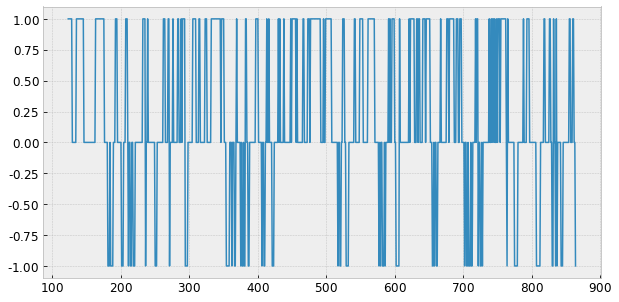

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data['MACD_Score'])

In [ ]:
import pandas as pd
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 123 to 864
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         742 non-null    datetime64[ns]
 1   Close        742 non-null    int64         
 2   Open         742 non-null    int64         
 3   High         742 non-null    int64         
 4   Low          742 non-null    int64         
 5   Volume       742 non-null    int64         
 6   ma5          742 non-null    float64       
 7   ma20         742 non-null    float64       
 8   ma60         742 non-null    float64       
 9   ma120        742 non-null    float64       
 10  MACD         742 non-null    float64       
 11  MACD_Signal  742 non-null    float64       
 12  MACD_Minus   742 non-null    float64       
 13  MACD_Score   742 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(6)
memory usage: 87.0 KB


In [ ]:
data = data.set_index('Date')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2019-01-02 to 2021-12-30
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close        742 non-null    int64  
 1   Open         742 non-null    int64  
 2   High         742 non-null    int64  
 3   Low          742 non-null    int64  
 4   Volume       742 non-null    int64  
 5   ma5          742 non-null    float64
 6   ma20         742 non-null    float64
 7   ma60         742 non-null    float64
 8   ma120        742 non-null    float64
 9   MACD         742 non-null    float64
 10  MACD_Signal  742 non-null    float64
 11  MACD_Minus   742 non-null    float64
 12  MACD_Score   742 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 81.2 KB


In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='MACD_Score', buy=0, sell=0)

Date
2019-01-02     buy
2019-01-03     buy
2019-01-04     buy
2019-01-07     buy
2019-01-08     buy
              ... 
2021-12-24     buy
2021-12-27     buy
2021-12-28     buy
2021-12-29     buy
2021-12-30    zero
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    ll
2019-01-04    ll
2019-01-07    ll
2019-01-08    ll
              ..
2021-12-24    ll
2021-12-27    ll
2021-12-28    ll
2021-12-29    ll
2021-12-30    lz
Name: position, Length: 742, dtype: object

In [ ]:
def draw_chart(df, left=None, right=None, log=False):
    '''
    Draw chart on each y-axis
    :param df: Dataframe that contains data to plot
    :param left: Columns to use left y-axis ticks
    :param right: Columns to use right y-axis ticks
    :param log: Plot in log scale
    :return: Line chart
    '''

    fig, ax1 = plt.subplots(figsize=(30,20))
    x = df.index
    
    if left is not None:
        left = util.str_to_list(left)
        i = 6
        for c in left:
            ax1.plot(x, df[c], label=c, color='C'+str(i), alpha=1)
            i += 1
        if log:
            ax1.set_yscale('log')
            ax1.yaxis.set_major_formatter(ScalarFormatter())
            ax1.yaxis.set_minor_formatter(ScalarFormatter())
    else:
        ax1.axes.yaxis.set_visible(False)
    # secondary y
    if right is not None:
        right = util.str_to_list(right)
        ax2 = ax1.twinx()
        i = 1
        for c in right:
            ax2.plot(x, df[c], label=c+'(R)', color='C'+str(i), alpha=1)
            ax1.plot(np.nan, label=c+'(R)', color='C'+str(i))
            i += 1
        ax1.grid(False, axis='y')
        if log:
            ax2.set_yscale('log')
            ax2.yaxis.set_major_formatter(ScalarFormatter())
            ax2.yaxis.set_minor_formatter(ScalarFormatter())
    ax1.legend(loc=2)
    # plt.setp(ax1.xaxis.get

<Figure size 1800x1080 with 0 Axes>

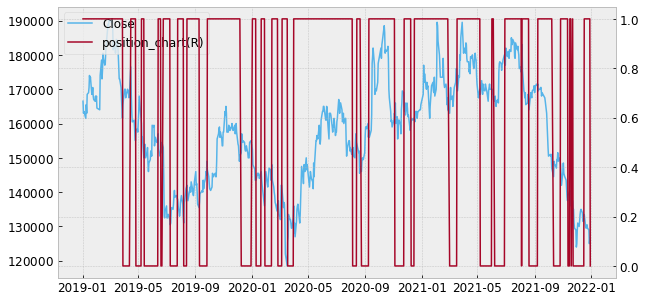

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=0.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,...,MACD_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,166500,166000,168000,163000,35501,166800.0,164375.0,156833.333333,157162.500000,3407.128737,...,1,buy,,1,1.000000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-03,163000,167000,167500,162500,38021,166000.0,164700.0,156991.666667,157116.666667,2887.599677,...,1,buy,ll,1,1.000000,1.000000,1.000000,0.00,1.0000,0.9790
2019-01-04,163500,162000,164000,161000,34069,165700.0,164950.0,157166.666667,157037.500000,2487.540161,...,1,buy,ll,1,1.000000,1.003067,1.003067,0.31,1.0000,0.9820
2019-01-07,162000,166000,168500,160500,39074,164400.0,165250.0,157400.000000,156945.833333,2026.097062,...,1,buy,ll,1,1.000000,0.990826,0.993865,-0.61,0.9908,0.9730
2019-01-08,161500,164000,164500,160500,35181,163300.0,165425.0,157758.333333,156854.166667,1601.592104,...,1,buy,ll,1,1.000000,0.996914,0.990798,-0.92,0.9878,0.9700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,129500,130500,131500,129000,29213,129900.0,130725.0,139591.666667,156529.166667,-1989.294004,...,1,buy,ll,1,1.000000,0.992337,0.326260,-67.37,0.2792,0.6798
2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667,-2003.559187,...,1,buy,ll,1,1.000000,0.996139,0.325000,-67.50,0.2781,0.6772
2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000,-2310.991348,...,0,buy,ll,1,1.000000,0.968992,0.314923,-68.51,0.2695,0.6562


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.02)

CAGR: -31.83%
Accumulated return: -68.26%
Average return: -4.38%
Benchmark return : -24.32%
Number of trades: 25
Number of win: 4
Hit ratio: 16.00%
Investment period: 3.0yrs
Sharpe ratio: -1.09
MDD: -73.05%
Benchmark MDD: -37.80%


## buy = -0.5, sell = 0.5

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('CJ대한통운_19_21.csv', encoding = 'euc-kr')

In [ ]:
data

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2018-07-02,163000,-5000,-2.98,167000,169000,161500,104205,1.730970e+10,3.718410e+12,22812344
1,2018-07-03,167500,4500,2.76,163000,169000,163000,73375,1.229465e+10,3.821070e+12,22812344
2,2018-07-04,172500,5000,2.99,166000,176500,165500,146237,2.546774e+10,3.935130e+12,22812344
3,2018-07-05,169500,-3000,-1.74,173000,174000,165500,96180,1.617033e+10,3.866690e+12,22812344
4,2018-07-06,168500,-1000,-0.59,169500,171000,167500,65635,1.113304e+10,3.843880e+12,22812344
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,129000,-500,-0.39,130000,131000,128500,29982,3.872974e+09,2.942790e+12,22812344
862,2021-12-28,125000,-4000,-3.10,129000,129500,123500,190152,2.375581e+10,2.851540e+12,22812344
863,2021-12-29,126500,1500,1.20,125000,128000,124000,58042,7.340787e+09,2.885760e+12,22812344
864,2021-12-30,126000,-500,-0.40,126500,126500,124500,66720,8.386864e+09,2.874360e+12,22812344


In [ ]:
# 필요한 열만 추출하고 영어로 변경
Rename(data)

EMA(data)

MACD(data)

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,MACD_Signal,MACD_Minus
0,2018-07-02,163000,167000,169000,161500,104205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-03,167500,163000,169000,163000,73375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-07-04,172500,166000,176500,165500,146237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-07-05,169500,173000,174000,165500,96180,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-06,168500,169500,171000,167500,65635,168200.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667,-2003.559187,-2242.188084,238.628897
862,2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000,-2310.991348,-2255.948737,-55.042611
863,2021-12-29,126500,125000,128000,124000,58042,128100.0,130850.0,138358.333333,155195.833333,-2405.862798,-2285.931549,-119.931249
864,2021-12-30,126000,126500,126500,124500,66720,127200.0,130700.0,137950.000000,154741.666667,-2492.661081,-2327.277455,-165.383626


In [ ]:
# MACD : 12일 이동평균 - 26일 이동평균 
# MACD_Minus : MACD - signal의 차

# 매수 시점 : MACD >0, MACD가 음수에서 양수로 변경, MACD_Minus가 양수
# 매도 시점 : MACD <0, MACD가 양수에서 음수로 변경, MACD_Minus가 음수

# 다음 날에도 상승세 or 하락세가 지속될 경우 추가 구매 없음

def MACD_Score_back(df):
  box = []
  for i in range(len(df)-1):
      if df.iloc[i]['MACD'] > 0 or df.iloc[i]['MACD_Minus'] >0:
        if df.iloc[i]['MACD'] < df.iloc[i+1]['MACD']:
          box.append(0)
        else:
          box.append(1)
      elif df.iloc[i]['MACD'] < 0 or df.iloc[i]['MACD_Minus'] < 0:
        if df.iloc[i]['MACD'] > df.iloc[i+1]['MACD']:
          box.append(0)
        else:
          box.append(-1)
      else:
        box.append(0)
  box.append(0)
  df['MACD_Score'] = box
  df = df.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)
  return df

In [ ]:
MACD_Score_back(data)

In [ ]:
data

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,MACD_Signal,MACD_Minus,MACD_Score
123,2019-01-02,166500,166000,168000,163000,35501,166800.0,164375.0,156833.333333,157162.500000,3407.128737,3630.801848,-223.673112,1
124,2019-01-03,163000,167000,167500,162500,38021,166000.0,164700.0,156991.666667,157116.666667,2887.599677,3482.161414,-594.561737,1
125,2019-01-04,163500,162000,164000,161000,34069,165700.0,164950.0,157166.666667,157037.500000,2487.540161,3283.237163,-795.697003,1
126,2019-01-07,162000,166000,168500,160500,39074,164400.0,165250.0,157400.000000,156945.833333,2026.097062,3031.809143,-1005.712081,1
127,2019-01-08,161500,164000,164500,160500,35181,163300.0,165425.0,157758.333333,156854.166667,1601.592104,2745.765735,-1144.173631,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,2021-12-24,129500,130500,131500,129000,29213,129900.0,130725.0,139591.666667,156529.166667,-1989.294004,-2301.845308,312.551303,1
861,2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667,-2003.559187,-2242.188084,238.628897,1
862,2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000,-2310.991348,-2255.948737,-55.042611,0
863,2021-12-29,126500,125000,128000,124000,58042,128100.0,130850.0,138358.333333,155195.833333,-2405.862798,-2285.931549,-119.931249,0


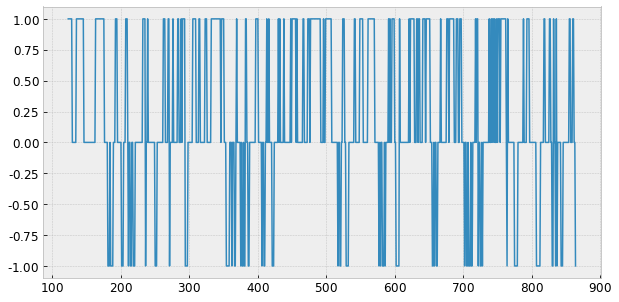

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data['MACD_Score'])

In [ ]:
import pandas as pd
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 123 to 864
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         742 non-null    datetime64[ns]
 1   Close        742 non-null    int64         
 2   Open         742 non-null    int64         
 3   High         742 non-null    int64         
 4   Low          742 non-null    int64         
 5   Volume       742 non-null    int64         
 6   ma5          742 non-null    float64       
 7   ma20         742 non-null    float64       
 8   ma60         742 non-null    float64       
 9   ma120        742 non-null    float64       
 10  MACD         742 non-null    float64       
 11  MACD_Signal  742 non-null    float64       
 12  MACD_Minus   742 non-null    float64       
 13  MACD_Score   742 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(6)
memory usage: 87.0 KB


In [ ]:
data = data.set_index('Date')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2019-01-02 to 2021-12-30
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close        742 non-null    int64  
 1   Open         742 non-null    int64  
 2   High         742 non-null    int64  
 3   Low          742 non-null    int64  
 4   Volume       742 non-null    int64  
 5   ma5          742 non-null    float64
 6   ma20         742 non-null    float64
 7   ma60         742 non-null    float64
 8   ma120        742 non-null    float64
 9   MACD         742 non-null    float64
 10  MACD_Signal  742 non-null    float64
 11  MACD_Minus   742 non-null    float64
 12  MACD_Score   742 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 81.2 KB


In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='MACD_Score', buy=-0.5, sell=0.5)

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
2019-01-08    zero
              ... 
2021-12-24    zero
2021-12-27    zero
2021-12-28    zero
2021-12-29    zero
2021-12-30     buy
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
2019-01-08    zz
              ..
2021-12-24    zz
2021-12-27    zz
2021-12-28    zz
2021-12-29    zz
2021-12-30    zl
Name: position, Length: 742, dtype: object

<Figure size 1800x1080 with 0 Axes>

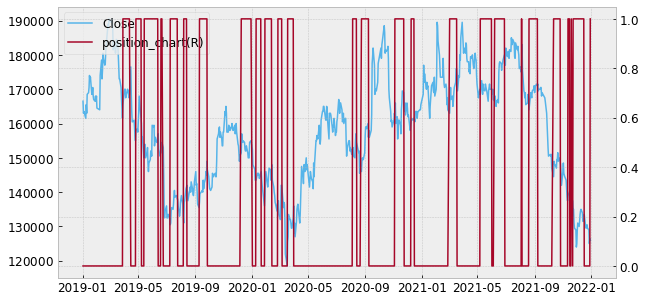

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=0.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,...,MACD_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,166500,166000,168000,163000,35501,166800.0,164375.0,156833.333333,157162.500000,3407.128737,...,1,zero,,0,1.0,1.0,1.000000,0.0,1.0000,1.0000
2019-01-03,163000,167000,167500,162500,38021,166000.0,164700.0,156991.666667,157116.666667,2887.599677,...,1,zero,zz,0,1.0,1.0,1.000000,0.0,1.0000,0.9790
2019-01-04,163500,162000,164000,161000,34069,165700.0,164950.0,157166.666667,157037.500000,2487.540161,...,1,zero,zz,0,1.0,1.0,1.000000,0.0,1.0000,0.9820
2019-01-07,162000,166000,168500,160500,39074,164400.0,165250.0,157400.000000,156945.833333,2026.097062,...,1,zero,zz,0,1.0,1.0,1.000000,0.0,1.0000,0.9730
2019-01-08,161500,164000,164500,160500,35181,163300.0,165425.0,157758.333333,156854.166667,1601.592104,...,1,zero,zz,0,1.0,1.0,1.000000,0.0,1.0000,0.9700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,129500,130500,131500,129000,29213,129900.0,130725.0,139591.666667,156529.166667,-1989.294004,...,1,zero,zz,0,1.0,1.0,2.422964,142.3,0.9832,0.6798
2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667,-2003.559187,...,1,zero,zz,0,1.0,1.0,2.422964,142.3,0.9832,0.6772
2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000,-2310.991348,...,0,zero,zz,0,1.0,1.0,2.422964,142.3,0.9832,0.6562


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.02)

CAGR: 34.39%
Accumulated return: 142.30%
Average return: 3.64%
Benchmark return : -24.32%
Number of trades: 26
Number of win: 24
Hit ratio: 92.31%
Investment period: 3.0yrs
Sharpe ratio: 1.76
MDD: -8.66%
Benchmark MDD: -37.80%


## buy = 0.5, sell = -0.5

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('CJ대한통운_19_21.csv', encoding = 'euc-kr')

In [ ]:
data

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2018-07-02,163000,-5000,-2.98,167000,169000,161500,104205,1.730970e+10,3.718410e+12,22812344
1,2018-07-03,167500,4500,2.76,163000,169000,163000,73375,1.229465e+10,3.821070e+12,22812344
2,2018-07-04,172500,5000,2.99,166000,176500,165500,146237,2.546774e+10,3.935130e+12,22812344
3,2018-07-05,169500,-3000,-1.74,173000,174000,165500,96180,1.617033e+10,3.866690e+12,22812344
4,2018-07-06,168500,-1000,-0.59,169500,171000,167500,65635,1.113304e+10,3.843880e+12,22812344
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,129000,-500,-0.39,130000,131000,128500,29982,3.872974e+09,2.942790e+12,22812344
862,2021-12-28,125000,-4000,-3.10,129000,129500,123500,190152,2.375581e+10,2.851540e+12,22812344
863,2021-12-29,126500,1500,1.20,125000,128000,124000,58042,7.340787e+09,2.885760e+12,22812344
864,2021-12-30,126000,-500,-0.40,126500,126500,124500,66720,8.386864e+09,2.874360e+12,22812344


In [ ]:
# 필요한 열만 추출하고 영어로 변경
Rename(data)

EMA(data)

MACD(data)

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,MACD_Signal,MACD_Minus
0,2018-07-02,163000,167000,169000,161500,104205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-03,167500,163000,169000,163000,73375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-07-04,172500,166000,176500,165500,146237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-07-05,169500,173000,174000,165500,96180,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-06,168500,169500,171000,167500,65635,168200.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667,-2003.559187,-2242.188084,238.628897
862,2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000,-2310.991348,-2255.948737,-55.042611
863,2021-12-29,126500,125000,128000,124000,58042,128100.0,130850.0,138358.333333,155195.833333,-2405.862798,-2285.931549,-119.931249
864,2021-12-30,126000,126500,126500,124500,66720,127200.0,130700.0,137950.000000,154741.666667,-2492.661081,-2327.277455,-165.383626


In [ ]:
# MACD : 12일 이동평균 - 26일 이동평균 
# MACD_Minus : MACD - signal의 차

# 매수 시점 : MACD >0, MACD가 음수에서 양수로 변경, MACD_Minus가 양수
# 매도 시점 : MACD <0, MACD가 양수에서 음수로 변경, MACD_Minus가 음수

# 다음 날에도 상승세 or 하락세가 지속될 경우 추가 구매 없음

def MACD_Score_back(df):
  box = []
  for i in range(len(df)-1):
      if df.iloc[i]['MACD'] > 0 or df.iloc[i]['MACD_Minus'] >0:
        if df.iloc[i]['MACD'] < df.iloc[i+1]['MACD']:
          box.append(0)
        else:
          box.append(1)
      elif df.iloc[i]['MACD'] < 0 or df.iloc[i]['MACD_Minus'] < 0:
        if df.iloc[i]['MACD'] > df.iloc[i+1]['MACD']:
          box.append(0)
        else:
          box.append(-1)
      else:
        box.append(0)
  box.append(0)
  df['MACD_Score'] = box
  df = df.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)
  return df

In [ ]:
MACD_Score_back(data)

In [ ]:
data

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,MACD_Signal,MACD_Minus,MACD_Score
123,2019-01-02,166500,166000,168000,163000,35501,166800.0,164375.0,156833.333333,157162.500000,3407.128737,3630.801848,-223.673112,1
124,2019-01-03,163000,167000,167500,162500,38021,166000.0,164700.0,156991.666667,157116.666667,2887.599677,3482.161414,-594.561737,1
125,2019-01-04,163500,162000,164000,161000,34069,165700.0,164950.0,157166.666667,157037.500000,2487.540161,3283.237163,-795.697003,1
126,2019-01-07,162000,166000,168500,160500,39074,164400.0,165250.0,157400.000000,156945.833333,2026.097062,3031.809143,-1005.712081,1
127,2019-01-08,161500,164000,164500,160500,35181,163300.0,165425.0,157758.333333,156854.166667,1601.592104,2745.765735,-1144.173631,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,2021-12-24,129500,130500,131500,129000,29213,129900.0,130725.0,139591.666667,156529.166667,-1989.294004,-2301.845308,312.551303,1
861,2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667,-2003.559187,-2242.188084,238.628897,1
862,2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000,-2310.991348,-2255.948737,-55.042611,0
863,2021-12-29,126500,125000,128000,124000,58042,128100.0,130850.0,138358.333333,155195.833333,-2405.862798,-2285.931549,-119.931249,0


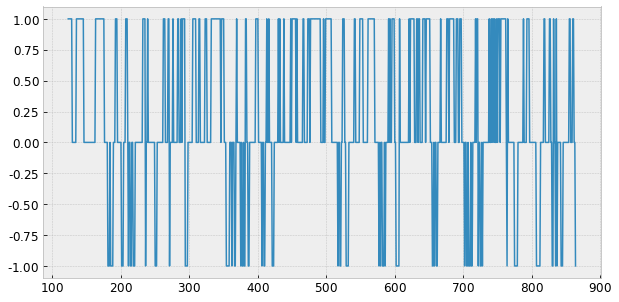

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data['MACD_Score'])

In [ ]:
import pandas as pd
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 123 to 864
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         742 non-null    datetime64[ns]
 1   Close        742 non-null    int64         
 2   Open         742 non-null    int64         
 3   High         742 non-null    int64         
 4   Low          742 non-null    int64         
 5   Volume       742 non-null    int64         
 6   ma5          742 non-null    float64       
 7   ma20         742 non-null    float64       
 8   ma60         742 non-null    float64       
 9   ma120        742 non-null    float64       
 10  MACD         742 non-null    float64       
 11  MACD_Signal  742 non-null    float64       
 12  MACD_Minus   742 non-null    float64       
 13  MACD_Score   742 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(6)
memory usage: 87.0 KB


In [ ]:
data = data.set_index('Date')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2019-01-02 to 2021-12-30
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close        742 non-null    int64  
 1   Open         742 non-null    int64  
 2   High         742 non-null    int64  
 3   Low          742 non-null    int64  
 4   Volume       742 non-null    int64  
 5   ma5          742 non-null    float64
 6   ma20         742 non-null    float64
 7   ma60         742 non-null    float64
 8   ma120        742 non-null    float64
 9   MACD         742 non-null    float64
 10  MACD_Signal  742 non-null    float64
 11  MACD_Minus   742 non-null    float64
 12  MACD_Score   742 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 81.2 KB


In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='MACD_Score', buy=-0.5, sell=0.5)

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
2019-01-08    zero
              ... 
2021-12-24    zero
2021-12-27    zero
2021-12-28    zero
2021-12-29    zero
2021-12-30     buy
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
2019-01-08    zz
              ..
2021-12-24    zz
2021-12-27    zz
2021-12-28    zz
2021-12-29    zz
2021-12-30    zl
Name: position, Length: 742, dtype: object

<Figure size 1800x1080 with 0 Axes>

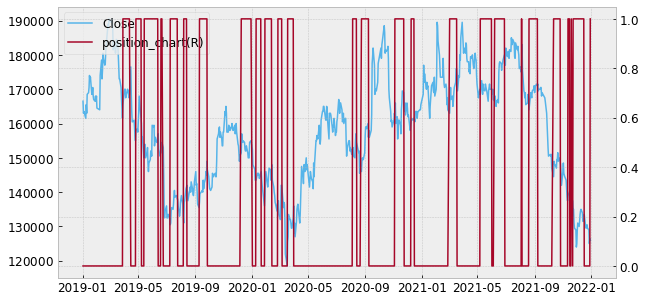

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=0.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,...,MACD_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,166500,166000,168000,163000,35501,166800.0,164375.0,156833.333333,157162.500000,3407.128737,...,1,zero,,0,1.0,1.0,1.000000,0.0,1.0000,1.0000
2019-01-03,163000,167000,167500,162500,38021,166000.0,164700.0,156991.666667,157116.666667,2887.599677,...,1,zero,zz,0,1.0,1.0,1.000000,0.0,1.0000,0.9790
2019-01-04,163500,162000,164000,161000,34069,165700.0,164950.0,157166.666667,157037.500000,2487.540161,...,1,zero,zz,0,1.0,1.0,1.000000,0.0,1.0000,0.9820
2019-01-07,162000,166000,168500,160500,39074,164400.0,165250.0,157400.000000,156945.833333,2026.097062,...,1,zero,zz,0,1.0,1.0,1.000000,0.0,1.0000,0.9730
2019-01-08,161500,164000,164500,160500,35181,163300.0,165425.0,157758.333333,156854.166667,1601.592104,...,1,zero,zz,0,1.0,1.0,1.000000,0.0,1.0000,0.9700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,129500,130500,131500,129000,29213,129900.0,130725.0,139591.666667,156529.166667,-1989.294004,...,1,zero,zz,0,1.0,1.0,2.422964,142.3,0.9832,0.6798
2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667,-2003.559187,...,1,zero,zz,0,1.0,1.0,2.422964,142.3,0.9832,0.6772
2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000,-2310.991348,...,0,zero,zz,0,1.0,1.0,2.422964,142.3,0.9832,0.6562


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.02)

CAGR: 34.39%
Accumulated return: 142.30%
Average return: 3.64%
Benchmark return : -24.32%
Number of trades: 26
Number of win: 24
Hit ratio: 92.31%
Investment period: 3.0yrs
Sharpe ratio: 1.76
MDD: -8.66%
Benchmark MDD: -37.80%


# 정분류율을 활용한 백테스팅

### buy = 0, sell =0

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('CJ대한통운_19_21.csv', encoding = 'euc-kr')

In [ ]:
data

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2018-07-02,163000,-5000,-2.98,167000,169000,161500,104205,1.730970e+10,3.718410e+12,22812344
1,2018-07-03,167500,4500,2.76,163000,169000,163000,73375,1.229465e+10,3.821070e+12,22812344
2,2018-07-04,172500,5000,2.99,166000,176500,165500,146237,2.546774e+10,3.935130e+12,22812344
3,2018-07-05,169500,-3000,-1.74,173000,174000,165500,96180,1.617033e+10,3.866690e+12,22812344
4,2018-07-06,168500,-1000,-0.59,169500,171000,167500,65635,1.113304e+10,3.843880e+12,22812344
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,129000,-500,-0.39,130000,131000,128500,29982,3.872974e+09,2.942790e+12,22812344
862,2021-12-28,125000,-4000,-3.10,129000,129500,123500,190152,2.375581e+10,2.851540e+12,22812344
863,2021-12-29,126500,1500,1.20,125000,128000,124000,58042,7.340787e+09,2.885760e+12,22812344
864,2021-12-30,126000,-500,-0.40,126500,126500,124500,66720,8.386864e+09,2.874360e+12,22812344


In [ ]:
# 필요한 열만 추출하고 영어로 변경
Rename(data)
EMA(data)

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120
0,2018-07-02,163000,167000,169000,161500,104205,NaN,NaN,NaN,NaN
1,2018-07-03,167500,163000,169000,163000,73375,NaN,NaN,NaN,NaN
2,2018-07-04,172500,166000,176500,165500,146237,NaN,NaN,NaN,NaN
3,2018-07-05,169500,173000,174000,165500,96180,NaN,NaN,NaN,NaN
4,2018-07-06,168500,169500,171000,167500,65635,168200.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667
862,2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000
863,2021-12-29,126500,125000,128000,124000,58042,128100.0,130850.0,138358.333333,155195.833333
864,2021-12-30,126000,126500,126500,124500,66720,127200.0,130700.0,137950.000000,154741.666667


In [ ]:
def Ma_Minus_back(df):
  box = []
  for i in range(len(df)):
    if (df.iloc[i]['ma5'] > df.iloc[i]['ma20']) & (df.iloc[i]['ma5'] > df.iloc[i]['ma60']) & (df.iloc[i]['ma5'] > df.iloc[i]['ma120']):
      box.append(1)
    elif (df.iloc[i]['ma5'] < df.iloc[i]['ma20']) & (df.iloc[i]['ma5'] < df.iloc[i]['ma60']) & (df.iloc[i]['ma5'] < df.iloc[i]['ma120']):
      box.append(-1)
    else: 
      box.append(0)
  df['Ma_Score'] = box
  df = df.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)  
  return df

In [ ]:
Ma_Minus_back(data)

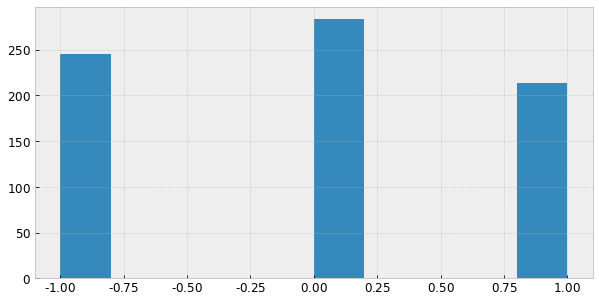

In [ ]:
import matplotlib.pyplot as plt
data['Ma_Score'].hist()

In [ ]:
import pandas as pd
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 123 to 864
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      742 non-null    datetime64[ns]
 1   Close     742 non-null    int64         
 2   Open      742 non-null    int64         
 3   High      742 non-null    int64         
 4   Low       742 non-null    int64         
 5   Volume    742 non-null    int64         
 6   ma5       742 non-null    float64       
 7   ma20      742 non-null    float64       
 8   ma60      742 non-null    float64       
 9   ma120     742 non-null    float64       
 10  Ma_Score  742 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6)
memory usage: 69.6 KB


In [ ]:
data = data.set_index('Date')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2019-01-02 to 2021-12-30
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     742 non-null    int64  
 1   Open      742 non-null    int64  
 2   High      742 non-null    int64  
 3   Low       742 non-null    int64  
 4   Volume    742 non-null    int64  
 5   ma5       742 non-null    float64
 6   ma20      742 non-null    float64
 7   ma60      742 non-null    float64
 8   ma120     742 non-null    float64
 9   Ma_Score  742 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 63.8 KB


In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='Ma_Score', buy=0, sell=0)

Date
2019-01-02     buy
2019-01-03     buy
2019-01-04     buy
2019-01-07     buy
2019-01-08     buy
              ... 
2021-12-24    zero
2021-12-27    zero
2021-12-28    zero
2021-12-29    zero
2021-12-30    zero
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    ll
2019-01-04    ll
2019-01-07    ll
2019-01-08    ll
              ..
2021-12-24    zz
2021-12-27    zz
2021-12-28    zz
2021-12-29    zz
2021-12-30    zz
Name: position, Length: 742, dtype: object

In [ ]:
def draw_chart(df, left=None, right=None, log=False):
    '''
    Draw chart on each y-axis
    :param df: Dataframe that contains data to plot
    :param left: Columns to use left y-axis ticks
    :param right: Columns to use right y-axis ticks
    :param log: Plot in log scale
    :return: Line chart
    '''

    fig, ax1 = plt.subplots(figsize=(30,20))
    x = df.index
    
    if left is not None:
        left = util.str_to_list(left)
        i = 6
        for c in left:
            ax1.plot(x, df[c], label=c, color='C'+str(i), alpha=1)
            i += 1
        if log:
            ax1.set_yscale('log')
            ax1.yaxis.set_major_formatter(ScalarFormatter())
            ax1.yaxis.set_minor_formatter(ScalarFormatter())
    else:
        ax1.axes.yaxis.set_visible(False)
    # secondary y
    if right is not None:
        right = util.str_to_list(right)
        ax2 = ax1.twinx()
        i = 1
        for c in right:
            ax2.plot(x, df[c], label=c+'(R)', color='C'+str(i), alpha=1)
            ax1.plot(np.nan, label=c+'(R)', color='C'+str(i))
            i += 1
        ax1.grid(False, axis='y')
        if log:
            ax2.set_yscale('log')
            ax2.yaxis.set_major_formatter(ScalarFormatter())
            ax2.yaxis.set_minor_formatter(ScalarFormatter())
    ax1.legend(loc=2)
    # plt.setp(ax1.xaxis.get

<Figure size 1800x1080 with 0 Axes>

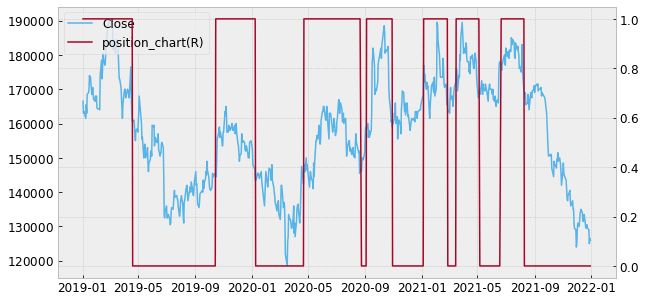

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=0.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,Ma_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,
2019-01-02,166500,166000,168000,163000,35501,166800.0,164375.0,156833.333333,157162.500000,1,buy,,1,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-03,163000,167000,167500,162500,38021,166000.0,164700.0,156991.666667,157116.666667,1,buy,ll,1,1.0,1.000000,1.000000,0.00,1.0000,0.9790
2019-01-04,163500,162000,164000,161000,34069,165700.0,164950.0,157166.666667,157037.500000,1,buy,ll,1,1.0,1.003067,1.003067,0.31,1.0000,0.9820
2019-01-07,162000,166000,168500,160500,39074,164400.0,165250.0,157400.000000,156945.833333,0,buy,ll,1,1.0,0.990826,0.993865,-0.61,0.9908,0.9730
2019-01-08,161500,164000,164500,160500,35181,163300.0,165425.0,157758.333333,156854.166667,0,buy,ll,1,1.0,0.996914,0.990798,-0.92,0.9878,0.9700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,129500,130500,131500,129000,29213,129900.0,130725.0,139591.666667,156529.166667,-1,zero,zz,0,1.0,1.000000,0.826581,-17.34,0.7073,0.6798
2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667,-1,zero,zz,0,1.0,1.000000,0.826581,-17.34,0.7073,0.6772
2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000,-1,zero,zz,0,1.0,1.000000,0.826581,-17.34,0.7073,0.6562


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.02)

CAGR: -6.16%
Accumulated return: -17.34%
Average return: -2.84%
Benchmark return : -24.32%
Number of trades: 6
Number of win: 1
Hit ratio: 16.67%
Investment period: 3.0yrs
Sharpe ratio: -0.32
MDD: -29.27%
Benchmark MDD: -37.80%


## buy = -0.5, sell =0.5

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('CJ대한통운_19_21.csv', encoding = 'euc-kr')

In [ ]:
data

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2018-07-02,163000,-5000,-2.98,167000,169000,161500,104205,1.730970e+10,3.718410e+12,22812344
1,2018-07-03,167500,4500,2.76,163000,169000,163000,73375,1.229465e+10,3.821070e+12,22812344
2,2018-07-04,172500,5000,2.99,166000,176500,165500,146237,2.546774e+10,3.935130e+12,22812344
3,2018-07-05,169500,-3000,-1.74,173000,174000,165500,96180,1.617033e+10,3.866690e+12,22812344
4,2018-07-06,168500,-1000,-0.59,169500,171000,167500,65635,1.113304e+10,3.843880e+12,22812344
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,129000,-500,-0.39,130000,131000,128500,29982,3.872974e+09,2.942790e+12,22812344
862,2021-12-28,125000,-4000,-3.10,129000,129500,123500,190152,2.375581e+10,2.851540e+12,22812344
863,2021-12-29,126500,1500,1.20,125000,128000,124000,58042,7.340787e+09,2.885760e+12,22812344
864,2021-12-30,126000,-500,-0.40,126500,126500,124500,66720,8.386864e+09,2.874360e+12,22812344


In [ ]:
# 필요한 열만 추출하고 영어로 변경
Rename(data)
EMA(data)

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120
0,2018-07-02,163000,167000,169000,161500,104205,NaN,NaN,NaN,NaN
1,2018-07-03,167500,163000,169000,163000,73375,NaN,NaN,NaN,NaN
2,2018-07-04,172500,166000,176500,165500,146237,NaN,NaN,NaN,NaN
3,2018-07-05,169500,173000,174000,165500,96180,NaN,NaN,NaN,NaN
4,2018-07-06,168500,169500,171000,167500,65635,168200.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667
862,2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000
863,2021-12-29,126500,125000,128000,124000,58042,128100.0,130850.0,138358.333333,155195.833333
864,2021-12-30,126000,126500,126500,124500,66720,127200.0,130700.0,137950.000000,154741.666667


In [ ]:
def Ma_Minus_back(df):
  box = []
  for i in range(len(df)):
    if (df.iloc[i]['ma5'] > df.iloc[i]['ma20']) & (df.iloc[i]['ma5'] > df.iloc[i]['ma60']) & (df.iloc[i]['ma5'] > df.iloc[i]['ma120']):
      box.append(1)
    elif (df.iloc[i]['ma5'] < df.iloc[i]['ma20']) & (df.iloc[i]['ma5'] < df.iloc[i]['ma60']) & (df.iloc[i]['ma5'] < df.iloc[i]['ma120']):
      box.append(-1)
    else: 
      box.append(0)
  df['Ma_Score'] = box
  df = df.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)  
  return df

In [ ]:
Ma_Minus_back(data)

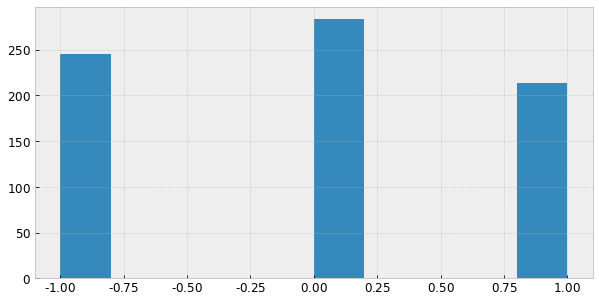

In [ ]:
import matplotlib.pyplot as plt
data['Ma_Score'].hist()

In [ ]:
import pandas as pd
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 123 to 864
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      742 non-null    datetime64[ns]
 1   Close     742 non-null    int64         
 2   Open      742 non-null    int64         
 3   High      742 non-null    int64         
 4   Low       742 non-null    int64         
 5   Volume    742 non-null    int64         
 6   ma5       742 non-null    float64       
 7   ma20      742 non-null    float64       
 8   ma60      742 non-null    float64       
 9   ma120     742 non-null    float64       
 10  Ma_Score  742 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6)
memory usage: 69.6 KB


In [ ]:
data = data.set_index('Date')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2019-01-02 to 2021-12-30
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     742 non-null    int64  
 1   Open      742 non-null    int64  
 2   High      742 non-null    int64  
 3   Low       742 non-null    int64  
 4   Volume    742 non-null    int64  
 5   ma5       742 non-null    float64
 6   ma20      742 non-null    float64
 7   ma60      742 non-null    float64
 8   ma120     742 non-null    float64
 9   Ma_Score  742 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 63.8 KB


In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='Ma_Score', buy = 0.5, sell = -0.5)

Date
2019-01-02     buy
2019-01-03     buy
2019-01-04     buy
2019-01-07     buy
2019-01-08     buy
              ... 
2021-12-24    zero
2021-12-27    zero
2021-12-28    zero
2021-12-29    zero
2021-12-30    zero
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    ll
2019-01-04    ll
2019-01-07    ll
2019-01-08    ll
              ..
2021-12-24    zz
2021-12-27    zz
2021-12-28    zz
2021-12-29    zz
2021-12-30    zz
Name: position, Length: 742, dtype: object

In [ ]:
def draw_chart(df, left=None, right=None, log=False):
    '''
    Draw chart on each y-axis
    :param df: Dataframe that contains data to plot
    :param left: Columns to use left y-axis ticks
    :param right: Columns to use right y-axis ticks
    :param log: Plot in log scale
    :return: Line chart
    '''

    fig, ax1 = plt.subplots(figsize=(30,20))
    x = df.index
    
    if left is not None:
        left = util.str_to_list(left)
        i = 6
        for c in left:
            ax1.plot(x, df[c], label=c, color='C'+str(i), alpha=1)
            i += 1
        if log:
            ax1.set_yscale('log')
            ax1.yaxis.set_major_formatter(ScalarFormatter())
            ax1.yaxis.set_minor_formatter(ScalarFormatter())
    else:
        ax1.axes.yaxis.set_visible(False)
    # secondary y
    if right is not None:
        right = util.str_to_list(right)
        ax2 = ax1.twinx()
        i = 1
        for c in right:
            ax2.plot(x, df[c], label=c+'(R)', color='C'+str(i), alpha=1)
            ax1.plot(np.nan, label=c+'(R)', color='C'+str(i))
            i += 1
        ax1.grid(False, axis='y')
        if log:
            ax2.set_yscale('log')
            ax2.yaxis.set_major_formatter(ScalarFormatter())
            ax2.yaxis.set_minor_formatter(ScalarFormatter())
    ax1.legend(loc=2)
    # plt.setp(ax1.xaxis.get

<Figure size 1800x1080 with 0 Axes>

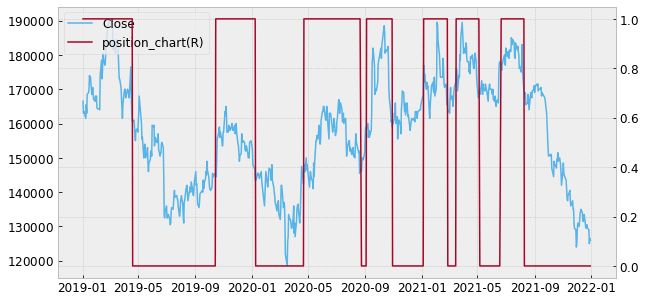

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=0.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,Ma_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,
2019-01-02,166500,166000,168000,163000,35501,166800.0,164375.0,156833.333333,157162.500000,1,buy,,1,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-03,163000,167000,167500,162500,38021,166000.0,164700.0,156991.666667,157116.666667,1,buy,ll,1,1.0,1.000000,1.000000,0.00,1.0000,0.9790
2019-01-04,163500,162000,164000,161000,34069,165700.0,164950.0,157166.666667,157037.500000,1,buy,ll,1,1.0,1.003067,1.003067,0.31,1.0000,0.9820
2019-01-07,162000,166000,168500,160500,39074,164400.0,165250.0,157400.000000,156945.833333,0,buy,ll,1,1.0,0.990826,0.993865,-0.61,0.9908,0.9730
2019-01-08,161500,164000,164500,160500,35181,163300.0,165425.0,157758.333333,156854.166667,0,buy,ll,1,1.0,0.996914,0.990798,-0.92,0.9878,0.9700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,129500,130500,131500,129000,29213,129900.0,130725.0,139591.666667,156529.166667,-1,zero,zz,0,1.0,1.000000,0.826581,-17.34,0.7073,0.6798
2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667,-1,zero,zz,0,1.0,1.000000,0.826581,-17.34,0.7073,0.6772
2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000,-1,zero,zz,0,1.0,1.000000,0.826581,-17.34,0.7073,0.6562


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.02)

CAGR: -6.16%
Accumulated return: -17.34%
Average return: -2.84%
Benchmark return : -24.32%
Number of trades: 6
Number of win: 1
Hit ratio: 16.67%
Investment period: 3.0yrs
Sharpe ratio: -0.32
MDD: -29.27%
Benchmark MDD: -37.80%


# 모멘텀을 활용한 백테스팅

### buy = -0.5, sell =0.5

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('CJ대한통운_19_21.csv', encoding = 'euc-kr')

In [ ]:
# 필요한 열만 추출하고 영어로 변경
Rename(data)
EMA(data)

data

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120
0,2018-07-02,163000,167000,169000,161500,104205,NaN,NaN,NaN,NaN
1,2018-07-03,167500,163000,169000,163000,73375,NaN,NaN,NaN,NaN
2,2018-07-04,172500,166000,176500,165500,146237,NaN,NaN,NaN,NaN
3,2018-07-05,169500,173000,174000,165500,96180,NaN,NaN,NaN,NaN
4,2018-07-06,168500,169500,171000,167500,65635,168200.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667
862,2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000
863,2021-12-29,126500,125000,128000,124000,58042,128100.0,130850.0,138358.333333,155195.833333
864,2021-12-30,126000,126500,126500,124500,66720,127200.0,130700.0,137950.000000,154741.666667


In [ ]:
def Momentom_5_20(data):
  data['Momentom_5'] = data['Close'].pct_change(periods = 5) * 100
  data['Momentom_20'] = data['Close'].pct_change(periods = 20) * 100
  data.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)
  data['Date'] = pd.to_datetime(data.Date)
  data = data.set_index('Date', inplace = True)
  return data

In [ ]:
Momentom_5_20(data)

In [ ]:
data

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,Momentom_5,Momentom_20
Date,,,,,,,,,,,
2019-01-02,166500,166000,168000,163000,35501,166800.0,164375.0,156833.333333,157162.500000,-2.346041,4.716981
2019-01-03,163000,167000,167500,162500,38021,166000.0,164700.0,156991.666667,157116.666667,-2.395210,4.153355
2019-01-04,163500,162000,164000,161000,34069,165700.0,164950.0,157166.666667,157037.500000,-0.909091,3.154574
2019-01-07,162000,166000,168500,160500,39074,164400.0,165250.0,157400.000000,156945.833333,-3.857567,3.846154
2019-01-08,161500,164000,164500,160500,35181,163300.0,165425.0,157758.333333,156854.166667,-3.293413,2.215190
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,129500,130500,131500,129000,29213,129900.0,130725.0,139591.666667,156529.166667,-2.996255,0.000000
2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667,-0.769231,0.000000
2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000,-3.474903,0.806452


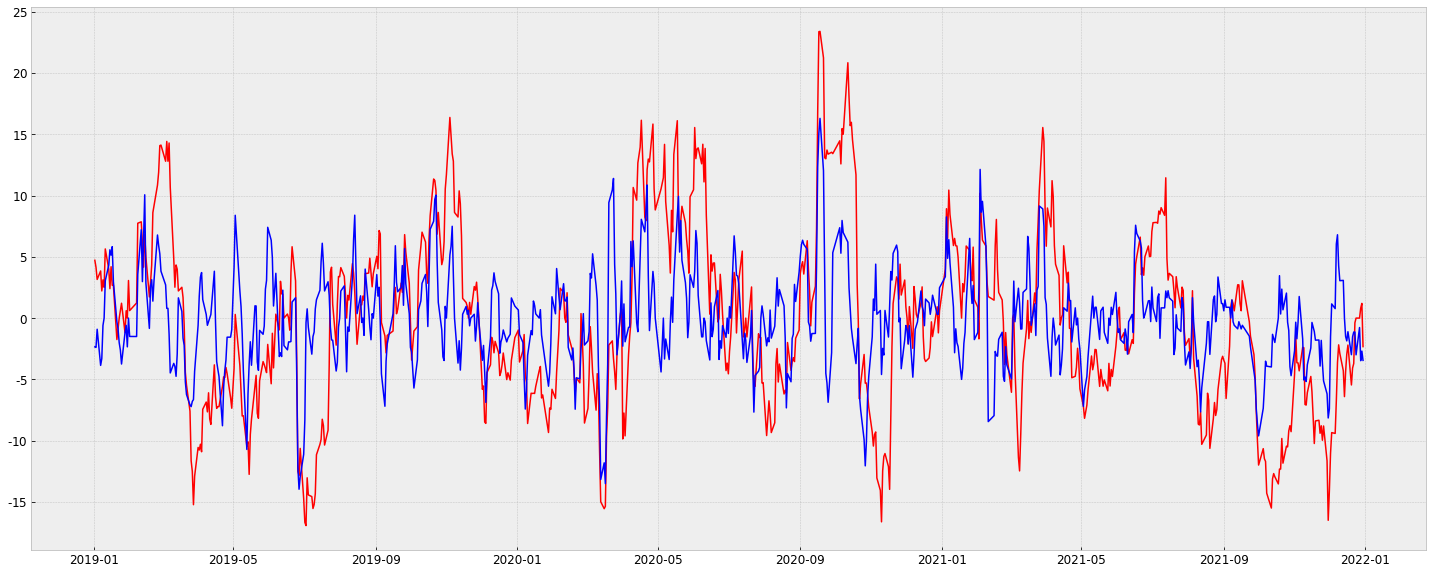

In [ ]:
# 극단적인 양수 비율(과매수)은 매도 타이밍, 음수 비율(과매도)은 매수 타이밍
plt.figure(figsize = (25,10))
plt.plot(data['Momentom_20'], color = 'red')
plt.plot(data['Momentom_5'], color = 'blue')

In [ ]:
# motentom_20 > 0 경우 매도, momentom_20 <0 경우 매수
# signal선 momentom_5를 momentom_20이 상향 돌파 경우 매수 
# signal선 momentom_5를 momentom_20이 하향 돌파 경우 매도 

def Momentom_Score_back(df):
  box = []
  for i in range(len(df)-1):
    if (df.iloc[i]['Momentom_20'] < 0) and (df.iloc[i]['Momentom_20'] < df.iloc[i]['Momentom_5']):
      if (df.iloc[i]['Momentom_20'] < df.iloc[i+1]['Momentom_20']):
        box.append(0)
      else:
        box.append(1)
    elif (df.iloc[i]['Momentom_20'] > df.iloc[i+1]['Momentom_20']):
      box.append(0)
    else :
      box.append(-1)    
  box.append(0)
  df['Momentom_Score'] = box
  return df

In [ ]:
Momentom_Score_back(data)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,Momentom_5,Momentom_20,Momentom_Score
Date,,,,,,,,,,,,
2019-01-02,166500,166000,168000,163000,35501,166800.0,164375.0,156833.333333,157162.500000,-2.346041,4.716981,0
2019-01-03,163000,167000,167500,162500,38021,166000.0,164700.0,156991.666667,157116.666667,-2.395210,4.153355,0
2019-01-04,163500,162000,164000,161000,34069,165700.0,164950.0,157166.666667,157037.500000,-0.909091,3.154574,-1
2019-01-07,162000,166000,168500,160500,39074,164400.0,165250.0,157400.000000,156945.833333,-3.857567,3.846154,0
2019-01-08,161500,164000,164500,160500,35181,163300.0,165425.0,157758.333333,156854.166667,-3.293413,2.215190,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,129500,130500,131500,129000,29213,129900.0,130725.0,139591.666667,156529.166667,-2.996255,0.000000,-1
2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667,-0.769231,0.000000,-1
2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000,-3.474903,0.806452,-1


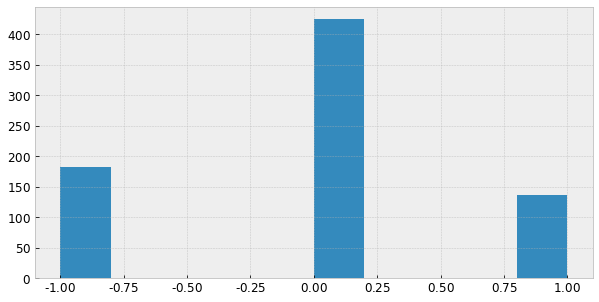

In [ ]:
data['Momentom_Score'].hist()

In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='Momentom_Score', buy = -0.5, sell = 0.5)

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04     buy
2019-01-07     buy
2019-01-08     buy
              ... 
2021-12-24     buy
2021-12-27     buy
2021-12-28     buy
2021-12-29     buy
2021-12-30     buy
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zl
2019-01-07    ll
2019-01-08    ll
              ..
2021-12-24    ll
2021-12-27    ll
2021-12-28    ll
2021-12-29    ll
2021-12-30    ll
Name: position, Length: 742, dtype: object

<Figure size 1800x1080 with 0 Axes>

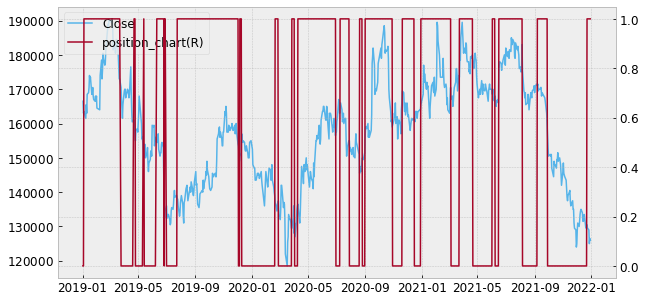

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=0.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,Momentom_5,...,Momentom_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,166500,166000,168000,163000,35501,166800.0,164375.0,156833.333333,157162.500000,-2.346041,...,0,zero,,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-03,163000,167000,167500,162500,38021,166000.0,164700.0,156991.666667,157116.666667,-2.395210,...,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,0.9790
2019-01-04,163500,162000,164000,161000,34069,165700.0,164950.0,157166.666667,157037.500000,-0.909091,...,-1,buy,zl,1,1.0,1.000000,1.000000,0.00,1.0000,0.9820
2019-01-07,162000,166000,168500,160500,39074,164400.0,165250.0,157400.000000,156945.833333,-3.857567,...,0,buy,ll,1,1.0,0.990826,0.990826,-0.92,0.9908,0.9730
2019-01-08,161500,164000,164500,160500,35181,163300.0,165425.0,157758.333333,156854.166667,-3.293413,...,-1,buy,ll,1,1.0,0.996914,0.987768,-1.22,0.9878,0.9700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,129500,130500,131500,129000,29213,129900.0,130725.0,139591.666667,156529.166667,-2.996255,...,-1,buy,ll,1,1.0,0.992337,1.071181,7.12,0.7595,0.6798
2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667,-0.769231,...,-1,buy,ll,1,1.0,0.996139,1.067046,6.70,0.7566,0.6772
2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000,-3.474903,...,-1,buy,ll,1,1.0,0.968992,1.033959,3.40,0.7331,0.6562


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.02)

CAGR: 1.39%
Accumulated return: 4.22%
Average return: 0.61%
Benchmark return : -24.32%
Number of trades: 20
Number of win: 13
Hit ratio: 65.00%
Investment period: 3.0yrs
Sharpe ratio: -0.02
MDD: -27.04%
Benchmark MDD: -37.80%


### buy = 0, sell = 0

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('CJ대한통운_19_21.csv', encoding = 'euc-kr')

In [ ]:
# 필요한 열만 추출하고 영어로 변경
Rename(data)
EMA(data)

data

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120
0,2018-07-02,163000,167000,169000,161500,104205,NaN,NaN,NaN,NaN
1,2018-07-03,167500,163000,169000,163000,73375,NaN,NaN,NaN,NaN
2,2018-07-04,172500,166000,176500,165500,146237,NaN,NaN,NaN,NaN
3,2018-07-05,169500,173000,174000,165500,96180,NaN,NaN,NaN,NaN
4,2018-07-06,168500,169500,171000,167500,65635,168200.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667
862,2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000
863,2021-12-29,126500,125000,128000,124000,58042,128100.0,130850.0,138358.333333,155195.833333
864,2021-12-30,126000,126500,126500,124500,66720,127200.0,130700.0,137950.000000,154741.666667


In [ ]:
def Momentom_5_20(data):
  data['Momentom_5'] = data['Close'].pct_change(periods = 5) * 100
  data['Momentom_20'] = data['Close'].pct_change(periods = 20) * 100
  data.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)
  data['Date'] = pd.to_datetime(data.Date)
  data = data.set_index('Date', inplace = True)
  return data

In [ ]:
Momentom_5_20(data)

In [ ]:
data

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,Momentom_5,Momentom_20
Date,,,,,,,,,,,
2019-01-02,166500,166000,168000,163000,35501,166800.0,164375.0,156833.333333,157162.500000,-2.346041,4.716981
2019-01-03,163000,167000,167500,162500,38021,166000.0,164700.0,156991.666667,157116.666667,-2.395210,4.153355
2019-01-04,163500,162000,164000,161000,34069,165700.0,164950.0,157166.666667,157037.500000,-0.909091,3.154574
2019-01-07,162000,166000,168500,160500,39074,164400.0,165250.0,157400.000000,156945.833333,-3.857567,3.846154
2019-01-08,161500,164000,164500,160500,35181,163300.0,165425.0,157758.333333,156854.166667,-3.293413,2.215190
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,129500,130500,131500,129000,29213,129900.0,130725.0,139591.666667,156529.166667,-2.996255,0.000000
2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667,-0.769231,0.000000
2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000,-3.474903,0.806452


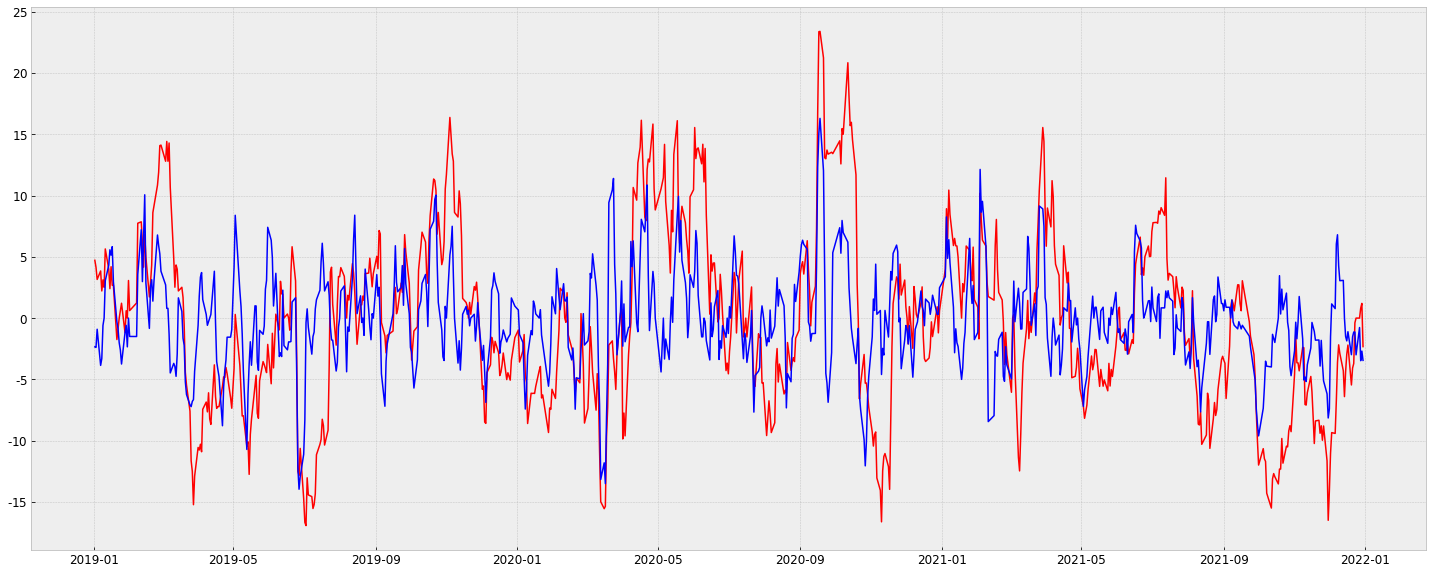

In [ ]:
# 극단적인 양수 비율(과매수)은 매도 타이밍, 음수 비율(과매도)은 매수 타이밍
plt.figure(figsize = (25,10))
plt.plot(data['Momentom_20'], color = 'red')
plt.plot(data['Momentom_5'], color = 'blue')

In [ ]:
# motentom_20 > 0 경우 매도, momentom_20 <0 경우 매수
# signal선 momentom_5를 momentom_20이 상향 돌파 경우 매수 
# signal선 momentom_5를 momentom_20이 하향 돌파 경우 매도 

def Momentom_Score_back(df):
  box = []
  for i in range(len(df)-1):
    if (df.iloc[i]['Momentom_20'] < 0) and (df.iloc[i]['Momentom_20'] < df.iloc[i]['Momentom_5']):
      if (df.iloc[i]['Momentom_20'] < df.iloc[i+1]['Momentom_20']):
        box.append(0)
      else:
        box.append(1)
    elif (df.iloc[i]['Momentom_20'] > df.iloc[i+1]['Momentom_20']):
      box.append(0)
    else :
      box.append(-1)    
  box.append(0)
  df['Momentom_Score'] = box
  return df

In [ ]:
Momentom_Score_back(data)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,Momentom_5,Momentom_20,Momentom_Score
Date,,,,,,,,,,,,
2019-01-02,166500,166000,168000,163000,35501,166800.0,164375.0,156833.333333,157162.500000,-2.346041,4.716981,0
2019-01-03,163000,167000,167500,162500,38021,166000.0,164700.0,156991.666667,157116.666667,-2.395210,4.153355,0
2019-01-04,163500,162000,164000,161000,34069,165700.0,164950.0,157166.666667,157037.500000,-0.909091,3.154574,-1
2019-01-07,162000,166000,168500,160500,39074,164400.0,165250.0,157400.000000,156945.833333,-3.857567,3.846154,0
2019-01-08,161500,164000,164500,160500,35181,163300.0,165425.0,157758.333333,156854.166667,-3.293413,2.215190,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,129500,130500,131500,129000,29213,129900.0,130725.0,139591.666667,156529.166667,-2.996255,0.000000,-1
2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667,-0.769231,0.000000,-1
2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000,-3.474903,0.806452,-1


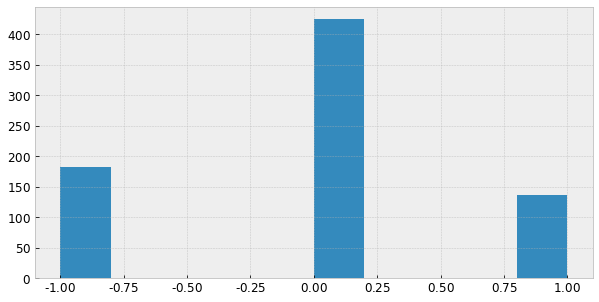

In [ ]:
data['Momentom_Score'].hist()

In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='Momentom_Score', buy = -0.5, sell = 0.5)

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04     buy
2019-01-07     buy
2019-01-08     buy
              ... 
2021-12-24     buy
2021-12-27     buy
2021-12-28     buy
2021-12-29     buy
2021-12-30     buy
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zl
2019-01-07    ll
2019-01-08    ll
              ..
2021-12-24    ll
2021-12-27    ll
2021-12-28    ll
2021-12-29    ll
2021-12-30    ll
Name: position, Length: 742, dtype: object

<Figure size 1800x1080 with 0 Axes>

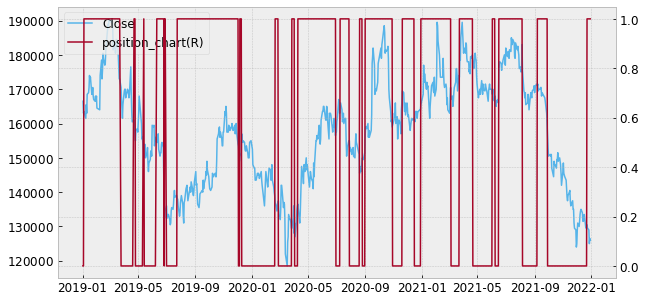

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=0.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,Momentom_5,...,Momentom_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,166500,166000,168000,163000,35501,166800.0,164375.0,156833.333333,157162.500000,-2.346041,...,0,zero,,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-03,163000,167000,167500,162500,38021,166000.0,164700.0,156991.666667,157116.666667,-2.395210,...,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,0.9790
2019-01-04,163500,162000,164000,161000,34069,165700.0,164950.0,157166.666667,157037.500000,-0.909091,...,-1,buy,zl,1,1.0,1.000000,1.000000,0.00,1.0000,0.9820
2019-01-07,162000,166000,168500,160500,39074,164400.0,165250.0,157400.000000,156945.833333,-3.857567,...,0,buy,ll,1,1.0,0.990826,0.990826,-0.92,0.9908,0.9730
2019-01-08,161500,164000,164500,160500,35181,163300.0,165425.0,157758.333333,156854.166667,-3.293413,...,-1,buy,ll,1,1.0,0.996914,0.987768,-1.22,0.9878,0.9700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,129500,130500,131500,129000,29213,129900.0,130725.0,139591.666667,156529.166667,-2.996255,...,-1,buy,ll,1,1.0,0.992337,1.071181,7.12,0.7595,0.6798
2021-12-27,129000,130000,131000,128500,29982,129700.0,130725.0,139191.666667,156104.166667,-0.769231,...,-1,buy,ll,1,1.0,0.996139,1.067046,6.70,0.7566,0.6772
2021-12-28,125000,129000,129500,123500,190152,128800.0,130775.0,138766.666667,155650.000000,-3.474903,...,-1,buy,ll,1,1.0,0.968992,1.033959,3.40,0.7331,0.6562


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.02)

CAGR: 1.39%
Accumulated return: 4.22%
Average return: 0.61%
Benchmark return : -24.32%
Number of trades: 20
Number of win: 13
Hit ratio: 65.00%
Investment period: 3.0yrs
Sharpe ratio: -0.02
MDD: -27.04%
Benchmark MDD: -37.80%
